In [1]:
import pandas as pd
import spacy
import scispacy
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# **Load and Filter Data**

In [72]:
# Load MIMIC-III dataset files (optimize memory usage)
noteevents_df = pd.read_csv("data/NOTEEVENTS.csv", usecols=["SUBJECT_ID", "CATEGORY", "TEXT"])
diagnoses_icd_df = pd.read_csv("data/DIAGNOSES_ICD.csv", dtype={"ICD9_CODE": str})

# Ensure column names are consistent
diagnoses_icd_df.columns = diagnoses_icd_df.columns.str.upper()

# Drop missing values in ICD9_CODE before filtering
diagnoses_icd_df = diagnoses_icd_df.dropna(subset=["ICD9_CODE"])

# Filter for ICD-9 Code '5715' (Liver disease)
filtered_df = diagnoses_icd_df[diagnoses_icd_df["ICD9_CODE"] == "5715"]

# Extract unique SUBJECT_IDs & HADM_IDs
arr_subject_id = set(filtered_df["SUBJECT_ID"])  # Using set() for fast lookup

# Print summary
print(f"✅ Found {len(arr_subject_id)} unique patients with ICD-9 Code '5715'.")
print("📌 Sample SUBJECT_IDs:", list(arr_subject_id)[:10])  # Show first 10 IDs

# Optimized filtering using .isin()
filtered_notes_df = noteevents_df[noteevents_df["SUBJECT_ID"].isin(arr_subject_id)]

# Display filtered data
print(filtered_notes_df.head())

# Save filtered notes to CSV
filtered_notes_df.to_csv('liver_notes.csv', index=False)
print("✅ Filtered notes saved to 'liver_notes.csv'.")


✅ Found 1000 unique patients with ICD-9 Code '5715'.
📌 Sample SUBJECT_IDs: [86018, 6147, 4, 26629, 79876, 79877, 43017, 14350, 92175, 94229]
     SUBJECT_ID           CATEGORY  \
111        5458  Discharge summary   
120       68109  Discharge summary   
285       23637  Discharge summary   
286       23637  Discharge summary   
287       23637  Discharge summary   

                                                  TEXT  
111  Admission Date:  [**2137-3-7**]              D...  
120  Admission Date:  [**2189-9-7**]              D...  
285  Admission Date:  [**2194-7-24**]     Discharge...  
286  Admission Date:  [**2195-6-17**]       Dischar...  
287  Admission Date:  [**2195-6-17**]       Dischar...  
✅ Filtered notes saved to 'liver_notes.csv'.


# **Spacy**

In [9]:
import spacy
import pandas as pd

df = pd.read_csv("liver_notes.csv")[:5] # reduce to 5 for performance

nlp = spacy.load("en_core_web_sm")

def extract_entities(text):
    doc = nlp(text)
    return [(ent.text, ent.label_) for ent in doc.ents], doc

# Process and extract entities
for idx, row in df.iterrows():
    text = row['TEXT']
    entities, doc = extract_entities(text)  # Now correctly returning two values
    
    if entities:  # Only display if there are entities
        print(f"Idx: {idx} Entities Found: {len(entities)}")
        for entity, label in entities:
            print(f"Entity: {entity}, Label: {label}")
        print('*' * 100)

Idx: 0 Entities Found: 276
Entity: Admission Date:  , Label: ORG
Entity: 2137-3-7, Label: DATE
Entity: 2137-3-16, Label: DATE
Entity: 2060-10-8, Label: DATE
Entity: Name3 (LF, Label: ORG
Entity: 348, Label: CARDINAL
Entity: 76, Label: DATE
Entity: 1-31, Label: CARDINAL
Entity: NASH, Label: ORG
Entity: PSC, Label: ORG
Entity: Grade II, Label: PRODUCT
Entity: PSC, Label: ORG
Entity: CAD, Label: ORG
Entity: 1.8, Label: CARDINAL
Entity: 4.8, Label: CARDINAL
Entity: 5.8, Label: CARDINAL
Entity: 1-31, Label: CARDINAL
Entity: 3.5L, Label: CARDINAL
Entity: SBP, Label: GPE
Entity: the past several weeks, Label: DATE
Entity: NSAIDS, Label: ORG
Entity: 1, Label: CARDINAL
Entity: 2, Label: CARDINAL
Entity: 2, Label: CARDINAL
Entity: 2, Label: CARDINAL
Entity: Grade 2, Label: PRODUCT
Entity: 3, Label: CARDINAL
Entity: Cholangiocarcinoma, Label: ORG
Entity: 4, Label: CARDINAL
Entity: 5, Label: CARDINAL
Entity: 6, Label: CARDINAL
Entity: 8), Label: CARDINAL
Entity: MIB, Label: ORG
Entity: 1-3, Label:

In [74]:
from spacy import displacy

for idx, row in df.iterrows():
    text = row['TEXT']
    entities, doc = extract_entities(text)  # Now correctly returning two values
    
    if entities:  # Only display if there are entities
        displacy.render(doc, style="ent", jupyter=True)
        print('*' * 100)

****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


# Scispacy

In [76]:
import scispacy
import pandas as pd
import en_core_sci_lg
import warnings

# Suppress SciSpaCy warning
warnings.filterwarnings("ignore", category=UserWarning)

df = pd.read_csv("liver_notes.csv")[:5] # only use the 5 for performance
nlp = en_core_sci_lg.load()

# Function to extract named entities using SciSpaCy
def extract_entities(text):
    doc = nlp(text)
    return [(ent.text, ent.label_) for ent in doc.ents], doc

# Process and extract entities
for idx, row in df.iterrows():
    text = row['TEXT']
    entities, doc = extract_entities(text)  # Now correctly returning two values
    
    if entities:  # Only display if there are entities
        print(f"Idx: {idx} Entities Found: {len(entities)}")
        for entity, label in entities:
            print(f"Entity: {entity}, Label: {label}")
        print('*' * 100)

Idx: 0 Entities Found: 663
Entity: Admission, Label: ENTITY
Entity: Date, Label: ENTITY
Entity: Birth, Label: ENTITY
Entity: Sex, Label: ENTITY
Entity: Lisinopril, Label: ENTITY
Entity: Name3, Label: ENTITY
Entity: LF, Label: ENTITY
Entity: Acute renal failure, Label: ENTITY
Entity: Surgical, Label: ENTITY
Entity: Invasive Procedure, Label: ENTITY
Entity: yo, Label: ENTITY
Entity: male, Label: ENTITY
Entity: chronic kidney disease, Label: ENTITY
Entity: cirrhosis, Label: ENTITY
Entity: NASH, Label: ENTITY
Entity: PSC, Label: ENTITY
Entity: ascites, Label: ENTITY
Entity: Grade II esophageal, Label: ENTITY
Entity: varices, Label: ENTITY
Entity: DM2, Label: ENTITY
Entity: PSC, Label: ENTITY
Entity: CAD, Label: ENTITY
Entity: acute worsening, Label: ENTITY
Entity: creatinine, Label: ENTITY
Entity: Patient, Label: ENTITY
Entity: chronic kidney disease, Label: ENTITY
Entity: baseline, Label: ENTITY
Entity: creatinine, Label: ENTITY
Entity: elevated, Label: ENTITY
Entity: potassium, Label: EN

In [ ]:
# Process and extract entities
for idx, row in df.iterrows():
    text = row['TEXT']
    entities, doc = extract_entities(text)  # Now correctly returning two values
    
    if entities:  # Only display if there are entities
        displacy.render(doc, style="ent", jupyter=True)
        print('*' * 100)

****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


# Scispacy with en_ner_bc5cdr_md model

In [69]:
import en_ner_bc5cdr_md
import pandas as pd

df = pd.read_csv("liver_notes.csv")[:5] # only use the 5 for performance
nlp = en_ner_bc5cdr_md.load()
# Process and extract entities
for idx, row in df.iterrows():
    text = row['TEXT']
    entities, doc = extract_entities(text)  # Now correctly returning two values
    
    if entities:  # Only display if there are entities
        displacy.render(doc, style="ent", jupyter=True)
        print('*' * 100)

/Users/jesusminjares/Desktop/UT Austin MSAI/Courses/ AI395T AI in Healthcare/ai_healthcare/lib/python3.12/site-packages/spacy/util.py:910: UserWarning: [W095] Model 'en_ner_bc5cdr_md' (0.5.4) was trained with spaCy v3.7.4 and may not be 100% compatible with the current version (3.8.4). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


****************************************************************************************************


# **Word2Vec**

## Word2Vec Spacy

In [64]:
import pandas as pd
import spacy
import scispacy
import en_core_sci_lg
from spacy import displacy
from gensim.models import Word2Vec

# Load dataset
df = pd.read_csv("liver_notes.csv")[:100] # set to 100

# Load spacy NLP model
nlp = spacy.load("en_core_web_sm")  # Using standard SpaCy model

# Function to extract named entities using SciSpaCy
def extract_entities(text):
    doc = nlp(text)
    return [(ent.text, ent.label_) for ent in doc.ents], doc

sentences = []
for idx, row in df.iterrows():
    text = row['TEXT']
    entities, doc = extract_entities(text)  # Now correctly returning two values
    sentences.append([token.text for token in doc if not token.is_stop and not token.is_punct])

# Train Word2Vec model on extracted text
w2v_model_spacy = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)


In [78]:
# Print word vector and similar words in a formatted output
word = 'Furosemide'
if word in w2v_model_spacy.wv:
    similar_words = w2v_model_spacy.wv.similar_by_word(word)
    # Print each tuple in a row
    for word, score in similar_words:
        print(f"{word:<20} {score:<20.4f}")  # Align left, 4 decimal places for score

else:
    print(f"Word '{word}' not found in vocabulary.")

HS                   0.9968              
Solution             0.9955              
HCl                  0.9954              
Divalproex           0.9949              
QHS                  0.9942              
Plavix               0.9942              
b.i.d                0.9941              
QAM                  0.9939              
Nadolol              0.9937              
Capsule              0.9936              


##  Word2Vec Scispacy

In [70]:
import pandas as pd
import spacy
import scispacy
import en_core_sci_lg
from spacy import displacy
from gensim.models import Word2Vec

# Load dataset
df = pd.read_csv("liver_notes.csv")[:100] # set to 100

# Load SciSpaCy NLP model
nlp = en_core_sci_lg.load()  # Using larger SciSpaCy model for better medical term recognition

# Function to extract named entities using SciSpaCy
def extract_entities(text):
    doc = nlp(text)
    return [(ent.text, ent.label_) for ent in doc.ents], doc

sentences = []
for idx, row in df.iterrows():
    text = row['TEXT']
    entities, doc = extract_entities(text)  # Now correctly returning two values
    sentences.append([token.text for token in doc if not token.is_stop and not token.is_punct])

# Train Word2Vec model on extracted text
w2v_model_scispacy = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)


/Users/jesusminjares/Desktop/UT Austin MSAI/Courses/ AI395T AI in Healthcare/ai_healthcare/lib/python3.12/site-packages/spacy/util.py:910: UserWarning: [W095] Model 'en_core_sci_lg' (0.5.4) was trained with spaCy v3.7.4 and may not be 100% compatible with the current version (3.8.4). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [79]:
# Print word vector and similar words in a formatted output
word = 'Furosemide'
if word in w2v_model_scispacy.wv:
    similar_words = w2v_model_scispacy.wv.similar_by_word(word)
    # Print each tuple in a row
    for word, score in similar_words:
        print(f"{word:<20} {score:<20.4f}")  # Align left, 4 decimal places for score

else:
    print(f"Word '{word}' not found in vocabulary.")

500                  0.9980              
Lasix                0.9979              
po                   0.9976              
bedtime              0.9974              
q.                   0.9974              
q                    0.9974              
mg                   0.9973              
p.o                  0.9971              
QID                  0.9971              
Aldactone            0.9968              


## **tSNE**

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
def tsne_plot(model,words, preTrained=False):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in words:
      if preTrained:
          tokens.append(model[word])
      else:
          tokens.append(model.wv[word])
      labels.append(word)

    tokens = np.array(tokens)
    tsne_model = TSNE(perplexity=30, early_exaggeration=12, n_components=2, init='pca', n_iter=1000, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(16, 16))
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

## tSNE-SpaCy plot

/Users/jesusminjares/Desktop/UT Austin MSAI/Courses/ AI395T AI in Healthcare/ai_healthcare/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


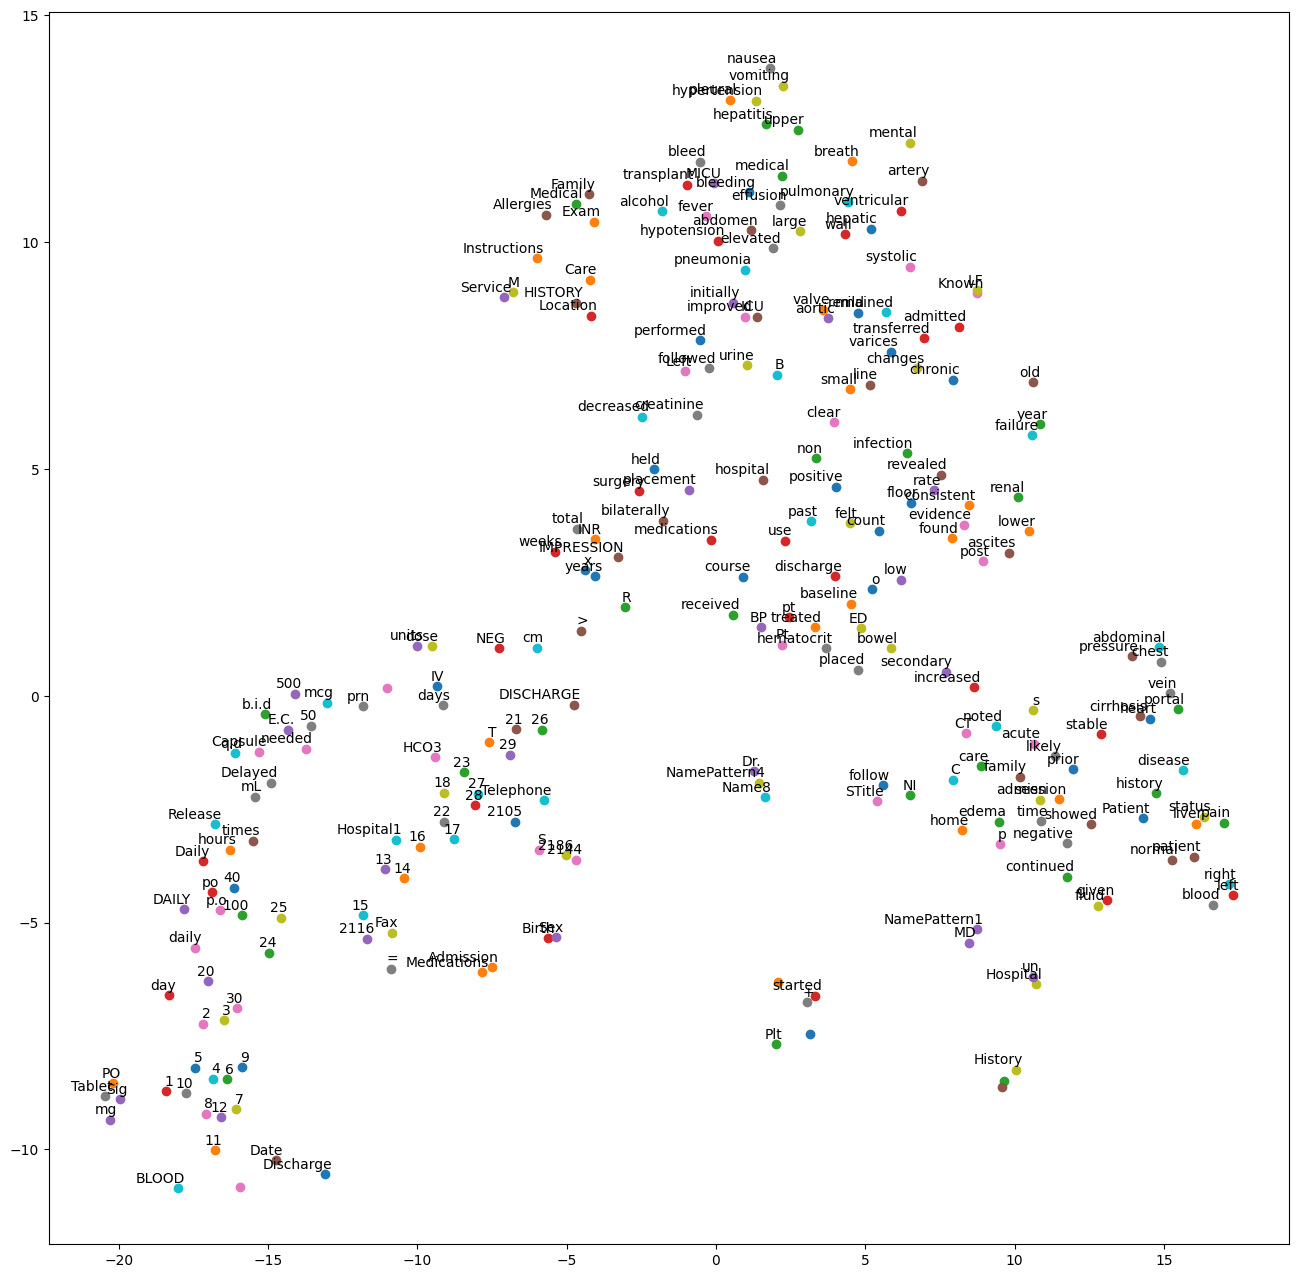

In [ ]:
vocabs = list(w2v_model_spacy.wv.index_to_key)[:250]  # Limit to 250 words for clarity
new_v = np.array(vocabs)
tsne_plot(w2v_model_spacy,new_v)

## tSNE-SciSpaCy plot

/Users/jesusminjares/Desktop/UT Austin MSAI/Courses/ AI395T AI in Healthcare/ai_healthcare/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


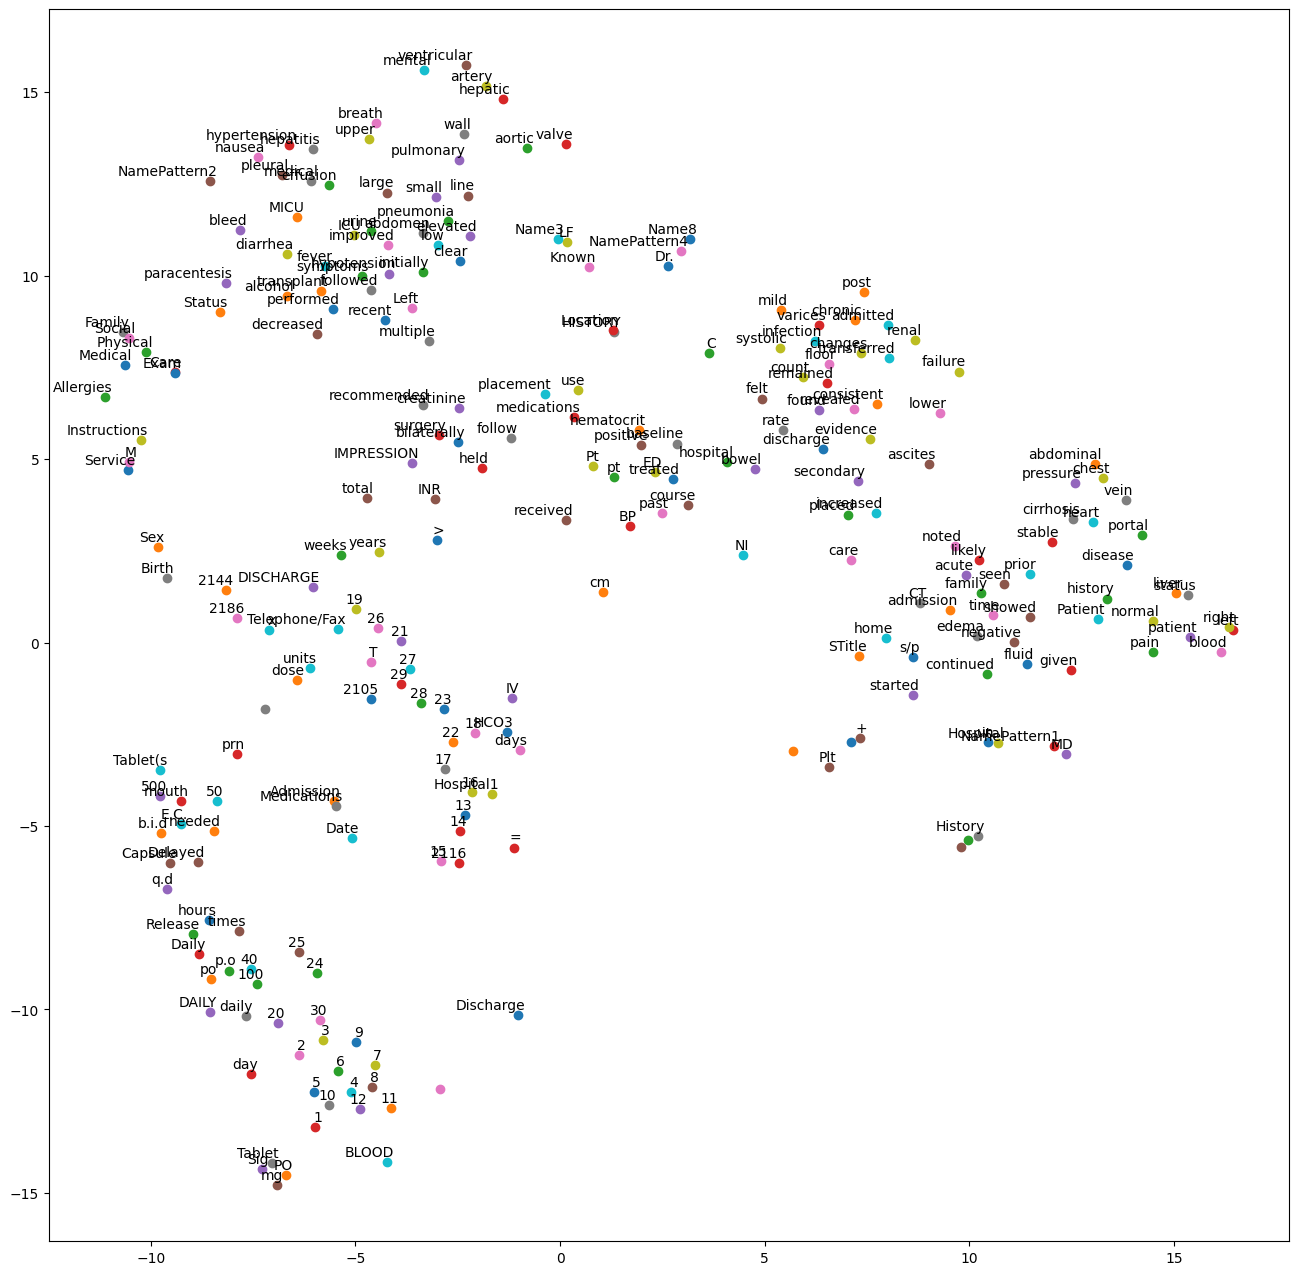

In [ ]:
vocabs = list(w2v_model_scispacy.wv.index_to_key)[:250]  # Limit to 250 words for clarity
new_v = np.array(vocabs)
tsne_plot(w2v_model_scispacy,new_v)

## MedSpaCy

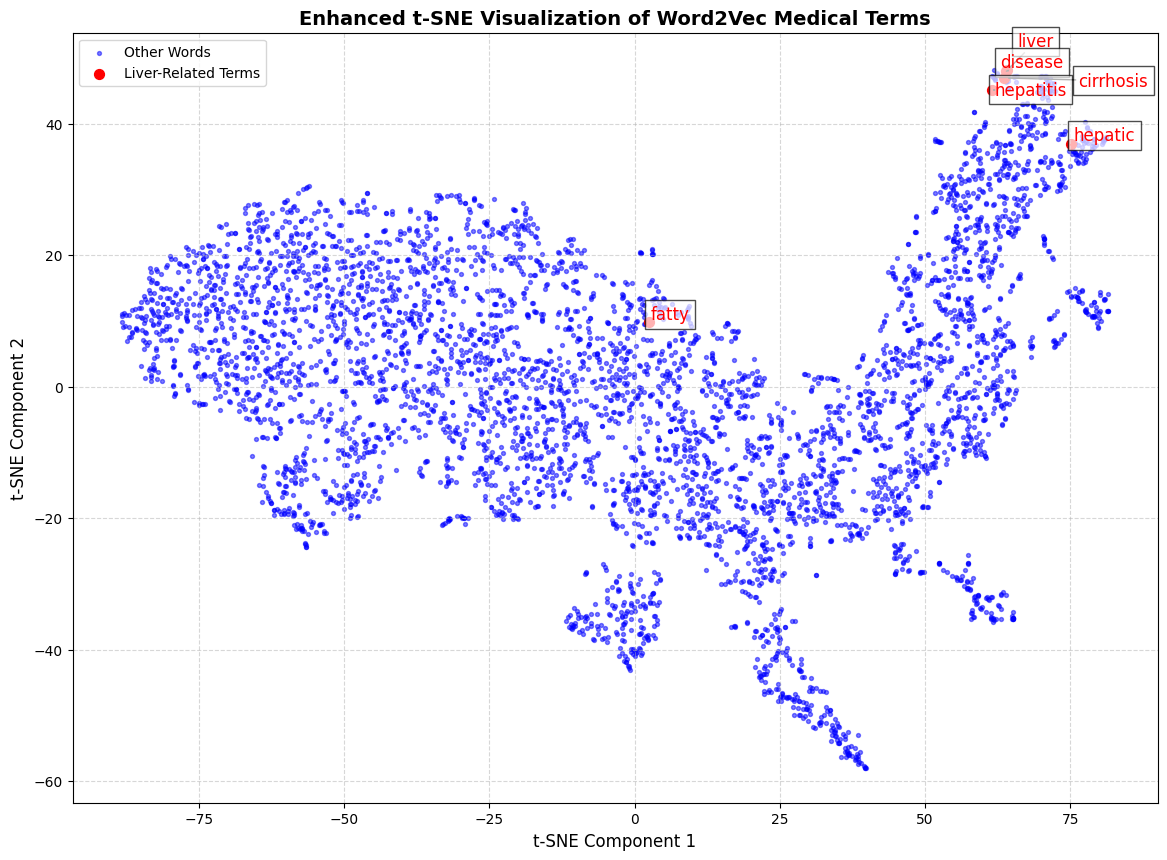

Extracted Entities: ['cirrhosis', 'Cirrhosis', 'cirrhosis', 'cirrhosis', 'cirrhosis', 'cirrhosis', 'cirrhosis', 'cirrhosis', 'Cirrhosis', 'Cirrhosis', 'hepatitis', 'Hepatitis', 'hepatitis', 'hepatitis', 'cirrhosis', 'hepatitis', 'Hepatitis', 'hypertension', 'hypertension', 'hypertension', 'Hypertension', 'Hypertension', 'Hypertension', 'cirrhosis', 'hypertension', 'cirrhosis', 'hepatitis', 'cirrhosis', 'hepatitis', 'hepatitis', 'hepatitis', 'hepatitis', 'hypertension', 'cirrhosis', 'cirrhosis', 'cirrhosis', 'Cirrhosis', 'cirrhosis', 'hepatitis', 'cirrhosis', 'hepatitis', 'hepatitis', 'cirrhosis', 'hypertension', 'liver disease', 'Liver disease', 'liver disease', 'hepatitis', 'hepatitis', 'cirrhosis', 'Hypertension', 'hepatitis', 'Hepatitis', 'Hepatitis', 'Hypertension', 'liver disease', 'hypertension', 'cirrhosis', 'cirrhosis', 'cirrhosis', 'cirrhosis', 'cirrhosis', 'Hepatitis', 'Hepatitis', 'Hepatitis', 'Hypertension', 'Hepatitis', 'Cirrhosis', 'cirrhosis', 'Hepatitis', 'Hepatitis', '

In [6]:
import medspacy
from medspacy.ner import TargetRule
import pandas as pd
import gensim
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import re
import nltk
from nltk.tokenize import word_tokenize
from adjustText import adjust_text  # Import adjustText for non-overlapping labels

# Load dataset (Limit to first 100 samples)
df = pd.read_csv("liver_notes.csv")[:100]

# Initialize MedSpacy NLP pipeline
nlp = medspacy.load(enable=['sentencizer', 'medspacy_target_matcher'])

# Define Target Rules for entity extraction (Liver-related conditions)
target_rules = [
    TargetRule('hyperlipidemia', 'DISEASE'),
    TargetRule('lipid', 'SUBSTANCE'),
    TargetRule('hypertension', 'DISEASE'),
    TargetRule('obesity', 'CONDITION'),
    TargetRule('cardiac', 'ENTITY'),
    # Liver-related conditions
    TargetRule('fatty liver', 'DISEASE'),
    TargetRule('cirrhosis', 'DISEASE'),
    TargetRule('hepatitis', 'DISEASE'),
    TargetRule('liver disease', 'DISEASE'),
    TargetRule('hepatic failure', 'DISEASE'),
]

# Add entity rules to MedSpacy pipeline
nlp.get_pipe('medspacy_target_matcher').add(target_rules)

# Extract Entities and Tokenize Text for Word2Vec
tokenized_texts = []
entities = []

for text in df['TEXT']:
    doc = nlp(text)
    
    # Tokenize text (remove special characters)
    tokens = [re.sub(r'\W+', '', token.text.lower()) for token in doc if token.text.isalpha()]
    tokenized_texts.append(tokens)
    
    # Extract disease entities
    entities.extend([ent.text for ent in doc.ents if ent.label_ == 'DISEASE'])

# Train Word2Vec Model
word2vec_model = Word2Vec(sentences=tokenized_texts, vector_size=100, window=5, min_count=2, workers=4)

# Get vectors for words in the vocabulary
words = list(word2vec_model.wv.index_to_key)
word_vectors = word2vec_model.wv[words]

# Reduce dimensions using t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
word_vectors_2d = tsne.fit_transform(word_vectors)

# Plot Word Embeddings
plt.figure(figsize=(14, 10))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1], alpha=0.5, s=8, color='blue', label="Other Words")

# Highlight Liver-Related Terms in Red
liver_terms = {'liver', 'fatty', 'cirrhosis', 'hepatitis', 'hepatic', 'disease'}
word_positions = {word: word_vectors_2d[i] for i, word in enumerate(words)}

texts = []  # Store text annotations for adjustment

for word in liver_terms:
    if word in word_positions:
        x, y = word_positions[word]
        plt.scatter(x, y, color='red', s=50, label="Liver-Related Terms" if "Liver-Related Terms" not in plt.gca().get_legend_handles_labels()[1] else "")
        text = plt.text(x, y, word, fontsize=12, color='red', bbox=dict(facecolor='white', alpha=0.7, edgecolor='black'))
        texts.append(text)

# Adjust text labels to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle="->", color='black', lw=1))

# Final Touches
plt.title("Enhanced t-SNE Visualization of Word2Vec Medical Terms", fontsize=14, fontweight='bold')
plt.xlabel("t-SNE Component 1", fontsize=12)
plt.ylabel("t-SNE Component 2", fontsize=12)
plt.legend(loc="upper left")
plt.grid(True, linestyle='--', alpha=0.5)

# Show the Improved Plot
plt.show()

# Display Extracted Entities
print("Extracted Entities:", entities)
